Importing all the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import kruskalwallis
from scipy.stats import mannwhitneyu
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
import statsmodels.api as sm
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Reading and Profiling the dataset

Reading the data

In [2]:
#Reading the data
df = pd.read_csv('Company_Finances_1000.csv')

In [4]:
df.shape

(632, 13)

In [3]:
#Observing the data
df.head()

,Unnamed: 0,Total Liab,Total Stockholder Equity,Total Assets,Total Current Liabilities,Total Current Assets,Long Term Debt,Inventory,Net Income,Gross Profit,Ebit,Total Revenue,Cost Of Revenue
0,RELIANCE.BO,"6,070,140,000,000.00","3,871,120,000,000.00","10,024,060,000,000.00","3,173,220,000,000.00","2,320,530,000,000.00","2,075,060,000,000.00","675,610,000,000.00","395,880,000,000.00","1,720,530,000,000.00","645,560,000,000.00","5,692,090,000,000.00","3,971,560,000,000.00"
1,KOTAKBANK.BO,"3,368,894,434,000.00","577,818,047,000.00","3,951,712,481,000.00","2,286,002,144,000.00","345,512,682,000.00","664,389,383,000.00",NaN,"72,041,305,000.00","297,471,420,000.00",0.00,"297,471,420,000.00",0.00
2,BHARTIARTL.BO,"1,902,080,000,000.00","714,222,000,000.00","2,751,560,000,000.00","930,134,000,000.00","328,642,000,000.00","824,901,000,000.00","884,000,000.00","4,095,000,000.00","385,199,000,000.00","47,451,000,000.00","811,090,000,000.00","425,891,000,000.00"
3,ITC.BO,"123,140,700,000.00","591,408,700,000.00","717,984,100,000.00","100,119,900,000.00","317,472,700,000.00","81,500,000.00","79,439,700,000.00","125,923,300,000.00","302,820,200,000.00","171,148,000,000.00","483,526,800,000.00","180,706,600,000.00"
4,ICICIBANK.BO,"11,179,599,481,000.00","1,142,534,068,000.00","12,387,938,907,000.00","7,292,903,383,000.00","1,101,087,373,000.00","2,084,145,868,000.00","10,040,166,000.00","42,542,387,000.00","716,671,406,000.00",0.00,"716,671,406,000.00",0.00


From the code above we can see that there is an unnamed column name containing the list of companies.Hence,
we will rename the column giving it a suitable name and set it as our dataframe index

In [4]:
df.rename(columns={'Unnamed: 0':'Company'},inplace=True)

In [5]:
df.set_index('Company',inplace=True)

In [6]:
df.head()

,Total Liab,Total Stockholder Equity,Total Assets,Total Current Liabilities,Total Current Assets,Long Term Debt,Inventory,Net Income,Gross Profit,Ebit,Total Revenue,Cost Of Revenue
Company,,,,,,,,,,,,
RELIANCE.BO,"6,070,140,000,000.00","3,871,120,000,000.00","10,024,060,000,000.00","3,173,220,000,000.00","2,320,530,000,000.00","2,075,060,000,000.00","675,610,000,000.00","395,880,000,000.00","1,720,530,000,000.00","645,560,000,000.00","5,692,090,000,000.00","3,971,560,000,000.00"
KOTAKBANK.BO,"3,368,894,434,000.00","577,818,047,000.00","3,951,712,481,000.00","2,286,002,144,000.00","345,512,682,000.00","664,389,383,000.00",NaN,"72,041,305,000.00","297,471,420,000.00",0.00,"297,471,420,000.00",0.00
BHARTIARTL.BO,"1,902,080,000,000.00","714,222,000,000.00","2,751,560,000,000.00","930,134,000,000.00","328,642,000,000.00","824,901,000,000.00","884,000,000.00","4,095,000,000.00","385,199,000,000.00","47,451,000,000.00","811,090,000,000.00","425,891,000,000.00"
ITC.BO,"123,140,700,000.00","591,408,700,000.00","717,984,100,000.00","100,119,900,000.00","317,472,700,000.00","81,500,000.00","79,439,700,000.00","125,923,300,000.00","302,820,200,000.00","171,148,000,000.00","483,526,800,000.00","180,706,600,000.00"
ICICIBANK.BO,"11,179,599,481,000.00","1,142,534,068,000.00","12,387,938,907,000.00","7,292,903,383,000.00","1,101,087,373,000.00","2,084,145,868,000.00","10,040,166,000.00","42,542,387,000.00","716,671,406,000.00",0.00,"716,671,406,000.00",0.00


Checking for any missing or null values

In [7]:
df.isnull().sum()

Total Liab                    0
Total Stockholder Equity      0
Total Assets                  0
Total Current Liabilities     0
Total Current Assets          0
Long Term Debt               10
Inventory                    43
Net Income                    0
Gross Profit                  0
Ebit                          0
Total Revenue                 0
Cost Of Revenue               0
dtype: int64

# Imputing the missing values in the dataset

In [8]:
#Checking the null values for 'Inventory' variable
df[df['Inventory'].isnull()]

,Total Liab,Total Stockholder Equity,Total Assets,Total Current Liabilities,Total Current Assets,Long Term Debt,Inventory,Net Income,Gross Profit,Ebit,Total Revenue,Cost Of Revenue
Company,,,,,,,,,,,,
KOTAKBANK.BO,"3,368,894,434,000.00","577,818,047,000.00","3,951,712,481,000.00","2,286,002,144,000.00","345,512,682,000.00","664,389,383,000.00",NaN,"72,041,305,000.00","297,471,420,000.00",0.00,"297,471,420,000.00",0.00
ABB.BO,"41,807,200,000.00","35,201,100,000.00","77,008,300,000.00","41,251,300,000.00","63,981,900,000.00","8,617,300,000.00",NaN,"3,034,000,000.00","24,251,800,000.00","4,828,700,000.00","73,150,600,000.00","48,898,800,000.00"
BEL.BO,"115,957,800,000.00","92,115,000,000.00","208,205,800,000.00","104,487,500,000.00","158,744,400,000.00","44,433,500,000.00",NaN,"18,864,000,000.00","60,725,600,000.00","26,238,600,000.00","121,641,700,000.00","60,916,100,000.00"
RECLTD.BO,"2,639,074,900,000.00","345,463,400,000.00","2,984,538,300,000.00","495,671,400,000.00","2,932,588,400,000.00","2,131,002,800,000.00",NaN,"57,413,800,000.00","96,539,600,000.00",0.00,"97,813,000,000.00","1,273,400,000.00"
RELAXO.BO,"5,063,600,000.00","11,050,700,000.00","16,114,300,000.00","4,629,100,000.00","7,269,800,000.00","3,966,600,000.00",NaN,"1,754,400,000.00","11,936,100,000.00","2,631,200,000.00","22,920,800,000.00","10,984,700,000.00"
AJANTPHARM.BO,"4,509,700,000.00","22,452,100,000.00","26,961,800,000.00","3,776,400,000.00","11,798,100,000.00","4,357,100,000.00",NaN,"3,869,700,000.00","16,432,500,000.00","4,945,800,000.00","20,553,700,000.00","4,121,200,000.00"
SCHAEFFLER.BO,"6,830,700,000.00","29,621,600,000.00","36,452,300,000.00","6,375,800,000.00","22,646,900,000.00","7,383,100,000.00",NaN,"3,676,400,000.00","16,110,400,000.00","5,069,200,000.00","43,606,300,000.00","27,495,900,000.00"
MGL.BO,"10,421,543,000.00","23,988,701,000.00","34,410,244,000.00","8,211,956,000.00","11,740,986,000.00","191,179,000.00",NaN,"5,463,891,000.00","13,864,158,000.00","7,637,391,000.00","27,910,734,000.00","14,046,576,000.00"
VGUARD.BO,"4,697,684,000.00","8,994,090,000.00","13,716,770,000.00","4,519,994,000.00","10,861,329,000.00","3,763,944,000.00",NaN,"1,672,368,000.00","7,673,434,000.00","2,041,919,000.00","25,940,087,000.00","18,266,653,000.00"


Here we can see that the 'Inventory' values are null for the companies

In [21]:
df.drop(df[df['Inventory'].isnull()].index,inplace=True)

As,it is possible in certain scenarios wherein a company may not have any inventory, we can impute its missing values with 0.
However,doing so might affect corresponding values of derived ratio:'Inventory Turnover Ratio' to have values above infinity.
Hence,we will remove these missing records

In [22]:
#Checking the null values for 'Long Term Debt' variable
df[df['Long Term Debt'].isnull()]

,Total Liab,Total Stockholder Equity,Total Assets,Total Current Liabilities,Total Current Assets,Long Term Debt,Inventory,Net Income,Gross Profit,Ebit,Total Revenue,Cost Of Revenue,Current Ratio,Debt to Equity Ratio,ROI,ROA,Inventory Turnover Ratio,Net Profit Margin,Total Expenses,In_stress
Company,,,,,,,,,,,,,,,,,,,,
RATNAMANI.BO,"5,303,719,000.00","15,227,509,000.00","20,531,228,000.00","4,871,533,000.00","14,182,943,000.00",NaN,"5,900,293,000.00","2,529,189,000.00","8,405,020,000.00","3,441,138,000.00","27,549,032,000.00","19,144,012,000.00",2.91,0.35,NaN,0.12,3.24,0.31,"25,019,843,000.00",0
RESPONIND.BO,"1,693,290,000.00","9,221,640,000.00","12,508,490,000.00","1,378,280,000.00","2,893,640,000.00",NaN,"768,170,000.00","287,040,000.00","2,244,020,000.00","338,680,000.00","7,750,380,000.00","5,506,360,000.00",2.10,0.18,NaN,0.02,7.17,0.29,"7,463,340,000.00",0
MMTC.BO,"31,110,900,000.00","12,687,300,000.00","43,798,200,000.00","29,225,400,000.00","38,785,900,000.00",NaN,"2,799,100,000.00","1,087,200,000.00","13,734,300,000.00","1,859,000,000.00","294,396,900,000.00","280,662,600,000.00",1.33,2.45,NaN,0.02,100.27,0.05,"293,309,700,000.00",0
ATFL.BO,"931,420,000.00","3,763,900,000.00","4,695,320,000.00","782,460,000.00","2,351,400,000.00",NaN,"840,250,000.00","342,540,000.00","2,586,760,000.00","477,270,000.00","8,236,610,000.00","5,649,850,000.00",3.01,0.25,NaN,0.07,6.72,0.31,"7,894,070,000.00",0
JAICORPLTD.BO,"4,079,301,000.00","10,341,067,000.00","17,062,876,000.00","3,813,402,000.00","5,090,606,000.00",NaN,"2,200,356,000.00","-1,081,006,000.00","2,433,335,000.00","860,516,000.00","6,605,232,000.00","4,171,897,000.00",1.33,0.39,NaN,-0.06,1.90,0.37,"7,686,238,000.00",1
ORIENTHOT.BO,"3,180,984,000.00","5,338,073,000.00","8,519,057,000.00","3,089,409,000.00","1,378,895,000.00",NaN,"71,755,000.00","915,852,000.00","1,966,389,000.00","230,657,000.00","3,467,858,000.00","1,501,469,000.00",0.45,0.60,NaN,0.11,20.92,0.57,"2,552,006,000.00",0
STCINDIA.BO,"73,209,800,000.00","-45,132,600,000.00","28,077,200,000.00","61,751,100,000.00","8,156,200,000.00",NaN,"1,600,000.00","-8,830,200,000.00","7,058,100,000.00","-757,700,000.00","89,034,400,000.00","81,976,300,000.00",0.13,-1.62,NaN,-0.31,"51,235.19",0.08,"97,864,600,000.00",1
RCOM.BO,"714,160,000,000.00","-41,800,000,000.00","675,580,000,000.00","668,910,000,000.00","439,590,000,000.00",NaN,"630,000,000.00","-72,060,000,000.00","15,160,000,000.00","-2,630,000,000.00","41,910,000,000.00","26,750,000,000.00",0.66,-17.09,NaN,-0.11,42.46,0.36,"113,970,000,000.00",1
GALLANTT.BO,"827,074,000.00","6,350,702,000.00","7,177,776,000.00","817,127,000.00","1,631,724,000.00",NaN,"1,107,250,000.00","1,043,419,000.00","2,649,758,000.00","1,122,304,000.00","10,637,853,000.00","7,988,095,000.00",2.00,0.13,NaN,0.15,7.21,0.25,"9,594,434,000.00",0


As we can see the variable 'Long Term Debt' is NaN for the given companies.Hover,after looking into it from an analytical
perspective these values can be assumed to be null as a company might be debt free

In [23]:
df.fillna(0,inplace=True)

# Deriving the necessary financial ratios from the dataset

Calculating Current Ratio

In [8]:
df['Current Ratio'] = df['Total Current Assets']/df['Total Current Liabilities']

Calculating Debt to Equity Ratio

In [9]:
df['Debt to Equity Ratio']=df['Total Liab']/df['Total Stockholder Equity']

Calculating Return on Investment

In [10]:
df['ROI']=df['Ebit']/(df['Total Stockholder Equity']+df['Long Term Debt'])

Calculating Return on Assests

In [11]:
df['ROA']=df['Net Income']/df['Total Assets']

Calculating Inventory Turnover Ratio

In [12]:
df['Inventory Turnover Ratio']=(df['Total Revenue']-df['Gross Profit'])/df['Inventory']

Calculating Net Profit Margin

In [13]:
df['Net Profit Margin']=df['Gross Profit']/df['Total Revenue']

Calculating the Total Expenses

In [14]:
df['Total Expenses']=df['Total Revenue']-df['Net Income']

Calculating the Company-in-stress ratio

In [15]:
df['In_stress']=df['Total Revenue']/df['Total Expenses']

In [16]:
df['In_stress']=(df['In_stress']<1)

In [17]:
df['In_stress']=df['In_stress'].replace({False:0,True:1})

In [18]:
df['In_stress'].value_counts()

0    545
1     87
Name: In_stress, dtype: int64

In [19]:
df['In_stress'].value_counts()/len(df)

0   0.86
1   0.14
Name: In_stress, dtype: float64

In [507]:
df.head(20)

,Total Liab,Total Stockholder Equity,Total Assets,Total Current Liabilities,Total Current Assets,Long Term Debt,Inventory,Net Income,Gross Profit,Ebit,Total Revenue,Cost Of Revenue,Current Ratio,Debt to Equity Ratio,ROI,ROA,Inventory Turnover Ratio,Net Profit Margin,Total Expenses,In_stress
Company,,,,,,,,,,,,,,,,,,,,
RELIANCE.BO,3.39,15.70,5.16,2.17,8.98,7.92,12.03,12.43,12.23,14.57,12.42,11.41,-0.58,-0.00,-0.22,-0.14,-0.10,-0.63,12.04,0
BHARTIARTL.BO,0.96,2.68,1.29,0.54,1.03,3.02,-0.25,-0.02,2.51,0.84,1.55,1.03,-0.84,0.10,-0.70,-0.64,0.04,0.20,1.62,0
ITC.BO,-0.08,2.17,0.21,-0.06,0.99,-0.22,1.18,3.85,1.91,3.68,0.82,0.31,1.04,-0.12,0.91,1.66,-0.10,0.93,0.58,0
ICICIBANK.BO,6.37,4.45,6.41,5.15,4.11,7.95,-0.08,1.20,4.92,-0.25,1.34,-0.22,-0.97,0.74,-0.89,-0.61,-0.10,2.74,1.31,0
SBIN.BO,21.13,9.41,20.50,21.60,16.38,16.00,-0.26,0.58,8.28,-0.25,2.37,-0.22,-0.98,1.26,-0.89,-0.65,-0.10,2.74,2.43,0
ASIANPAINT.BO,-0.11,0.12,-0.09,-0.09,0.02,-0.22,0.31,0.53,0.27,0.47,0.17,0.12,-0.09,-0.08,1.18,1.09,-0.10,-0.14,0.14,0
DMART.BO,-0.14,-0.04,-0.14,-0.12,-0.20,-0.15,-0.24,0.13,-0.08,0.08,0.19,0.28,0.06,-0.12,0.34,1.04,-0.06,-1.39,0.19,0
MARUTI.BO,-0.05,1.67,0.17,-0.03,0.21,-0.22,0.34,2.28,1.59,1.64,1.66,1.55,-0.49,-0.11,0.19,0.92,-0.09,-0.64,1.57,0
HCLTECH.BO,-0.15,-0.24,-0.17,-0.13,-0.26,-0.22,-0.27,-0.11,-0.27,-0.21,-0.23,-0.20,0.54,-0.11,0.74,1.57,0.02,-0.33,-0.24,0


In [24]:
df['In_stress'].value_counts()

0    506
1     83
Name: In_stress, dtype: int64

# Performing Univariate analysis on the dataset

In [25]:
df.head()

,Total Liab,Total Stockholder Equity,Total Assets,Total Current Liabilities,Total Current Assets,Long Term Debt,Inventory,Net Income,Gross Profit,Ebit,Total Revenue,Cost Of Revenue,Current Ratio,Debt to Equity Ratio,ROI,ROA,Inventory Turnover Ratio,Net Profit Margin,Total Expenses,In_stress
Company,,,,,,,,,,,,,,,,,,,,
RELIANCE.BO,"6,070,140,000,000.00","3,871,120,000,000.00","10,024,060,000,000.00","3,173,220,000,000.00","2,320,530,000,000.00","2,075,060,000,000.00","675,610,000,000.00","395,880,000,000.00","1,720,530,000,000.00","645,560,000,000.00","5,692,090,000,000.00","3,971,560,000,000.00",0.73,1.57,0.11,0.04,5.88,0.30,"5,296,210,000,000.00",0
BHARTIARTL.BO,"1,902,080,000,000.00","714,222,000,000.00","2,751,560,000,000.00","930,134,000,000.00","328,642,000,000.00","824,901,000,000.00","884,000,000.00","4,095,000,000.00","385,199,000,000.00","47,451,000,000.00","811,090,000,000.00","425,891,000,000.00",0.35,2.66,0.03,0.00,481.78,0.47,"806,995,000,000.00",0
ITC.BO,"123,140,700,000.00","591,408,700,000.00","717,984,100,000.00","100,119,900,000.00","317,472,700,000.00","81,500,000.00","79,439,700,000.00","125,923,300,000.00","302,820,200,000.00","171,148,000,000.00","483,526,800,000.00","180,706,600,000.00",3.17,0.21,0.29,0.18,2.27,0.63,"357,603,500,000.00",0
ICICIBANK.BO,"11,179,599,481,000.00","1,142,534,068,000.00","12,387,938,907,000.00","7,292,903,383,000.00","1,101,087,373,000.00","2,084,145,868,000.00","10,040,166,000.00","42,542,387,000.00","716,671,406,000.00",0.00,"716,671,406,000.00",0.00,0.15,9.78,0.00,0.00,0.00,1.00,"674,129,019,000.00",0
SBIN.BO,"36,479,315,443,000.00","2,344,956,605,000.00","38,884,641,961,000.00","30,004,424,063,000.00","4,175,283,407,000.00","4,137,476,610,000.00","236,584,000.00","22,996,391,000.00","1,178,693,354,520.00",0.00,"1,178,693,354,520.00",0.00,0.14,15.56,0.00,0.00,0.00,1.00,"1,155,696,963,520.00",0


In [26]:
df.describe()

,Total Liab,Total Stockholder Equity,Total Assets,Total Current Liabilities,Total Current Assets,Long Term Debt,Inventory,Net Income,Gross Profit,Ebit,Total Revenue,Cost Of Revenue,Current Ratio,Debt to Equity Ratio,ROI,ROA,Inventory Turnover Ratio,Net Profit Margin,Total Expenses,In_stress
count,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00,589.00
mean,"256,347,703,955.88","65,037,457,407.86","324,475,245,551.79","179,932,835,419.62","70,466,851,051.41","55,282,749,037.32","14,700,046,898.26","4,833,620,974.47","40,275,066,257.49","10,828,527,075.95","113,943,628,409.79","73,668,562,152.30",1.61,1.57,0.14,0.05,341.45,0.43,"109,110,007,435.32",0.14
std,"1,715,662,702,562.69","242,561,504,526.77","1,882,211,905,171.75","1,381,775,743,568.62","250,841,059,104.38","255,391,884,075.88","54,972,207,114.78","31,491,102,241.44","137,557,383,607.67","43,599,549,880.60","449,440,441,337.92","341,929,370,506.08",1.51,11.11,0.16,0.08,"3,478.39",0.21,"431,316,864,819.92",0.35
min,"20,078,000.00","-97,278,300,000.00","760,460,910.00","78,102,000.00","13,888,000.00",0.00,"140,000.00","-288,262,300,000.00","-97,545,098,000.00","-104,872,000,000.00","-97,545,098,000.00",0.00,0.01,-148.54,-2.24,-0.36,0.00,-0.27,"-21,094,900,000.00",0.00
25%,"5,120,418,000.00","4,951,619,000.00","12,212,267,000.00","3,707,800,000.00","5,414,989,000.00","444,181,000.00","942,846,000.00","311,960,000.00","3,758,091,000.00","729,545,000.00","10,504,066,000.00","4,953,133,000.00",1.01,0.60,0.08,0.02,2.05,0.29,"9,890,095,000.00",0.00
50%,"14,177,100,000.00","10,811,380,000.00","27,643,300,000.00","9,416,800,000.00","12,398,700,000.00","2,151,938,000.00","3,095,800,000.00","1,030,750,000.00","8,349,717,000.00","1,806,800,000.00","22,389,936,000.00","12,822,990,000.00",1.34,1.06,0.15,0.05,3.77,0.40,"21,319,435,000.00",0.00
75%,"52,565,900,000.00","31,223,900,000.00","89,364,100,000.00","31,587,600,000.00","37,806,000,000.00","12,873,400,000.00","8,560,063,000.00","3,246,180,000.00","23,327,100,000.00","5,906,668,000.00","59,831,400,000.00","31,515,084,000.00",1.78,2.09,0.21,0.08,7.84,0.54,"58,570,530,000.00",0.00
max,"36,479,315,443,000.00","3,871,120,000,000.00","38,884,641,961,000.00","30,004,424,063,000.00","4,175,283,407,000.00","4,137,476,610,000.00","771,264,800,000.00","395,880,000,000.00","1,720,530,000,000.00","645,560,000,000.00","5,692,090,000,000.00","4,475,481,800,000.00",20.81,129.22,0.78,0.98,"52,003.43",1.00,"5,296,210,000,000.00",1.00


From the dataframe description above we can observe that the medians for the variables:

'Total Liab',

'Total Stockholder equity',

'Total Assets',

'Total Current Liabilities',

'Total Current Assets',

'Long Term Debt',

'Inventory',

'Cost of Revenue'

 is much closer towards 25% quantile rather than towards 75% quantile of its data values.Hence,these features seem to have a left skewed distribution

In [27]:
df.isnull().sum()

Total Liab                   0
Total Stockholder Equity     0
Total Assets                 0
Total Current Liabilities    0
Total Current Assets         0
Long Term Debt               0
Inventory                    0
Net Income                   0
Gross Profit                 0
Ebit                         0
Total Revenue                0
Cost Of Revenue              0
Current Ratio                0
Debt to Equity Ratio         0
ROI                          0
ROA                          0
Inventory Turnover Ratio     0
Net Profit Margin            0
Total Expenses               0
In_stress                    0
dtype: int64

Segregating the columns of the dataframe into continuous variable and categorical variable columns

In [28]:
#Selecting a threshold of 20 
continuous_cols = [col for col in df.columns if df[col].nunique()>=20]
categorical_cols = [col for col in df.columns if df[col].nunique()<20]

In [29]:
(df['In_stress'].value_counts()/len(df))

0   0.86
1   0.14
Name: In_stress, dtype: float64

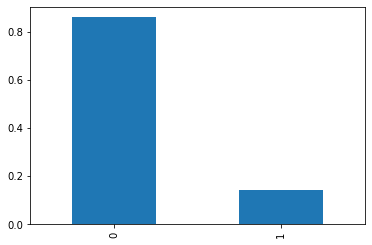

In [30]:
(df['In_stress'].value_counts()/len(df)).plot(kind='bar')

From the code above we can observe that the 'In_stress' variable has an imbalanced distribution and only 10% of the total records in the dataset are of companies that are actually 'In_stress'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, RELIANCE.BO to ADVANIHOTR.BO
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Liab                 589 non-null    float64
 1   Total Stockholder Equity   589 non-null    float64
 2   Total Assets               589 non-null    float64
 3   Total Current Liabilities  589 non-null    float64
 4   Total Current Assets       589 non-null    float64
 5   Long Term Debt             589 non-null    float64
 6   Inventory                  589 non-null    float64
 7   Net Income                 589 non-null    float64
 8   Gross Profit               589 non-null    float64
 9   Ebit                       589 non-null    float64
 10  Total Revenue              589 non-null    float64
 11  Cost Of Revenue            589 non-null    float64
 12  Current Ratio              589 non-null    float64
 13  Debt to Equity Ratio       589 non-

In [32]:
df.columns

Index(['Total Liab', 'Total Stockholder Equity', 'Total Assets',
       'Total Current Liabilities', 'Total Current Assets', 'Long Term Debt',
       'Inventory', 'Net Income', 'Gross Profit', 'Ebit', 'Total Revenue',
       'Cost Of Revenue', 'Current Ratio', 'Debt to Equity Ratio', 'ROI',
       'ROA', 'Inventory Turnover Ratio', 'Net Profit Margin',
       'Total Expenses', 'In_stress'],
      dtype='object')

In [33]:
original_cols = ['Total Liab', 'Total Stockholder Equity', 'Total Assets',
       'Total Current Liabilities', 'Total Current Assets', 'Long Term Debt',
       'Inventory', 'Net Income', 'Gross Profit', 'Ebit', 'Total Revenue',
       'Cost Of Revenue']

In [34]:
new_cols=['Current Ratio', 'Debt to Equity Ratio', 'ROI',
       'ROA', 'Net Profit Margin',
       'Total Expenses','Inventory Turnover Ratio', 'In_stress']

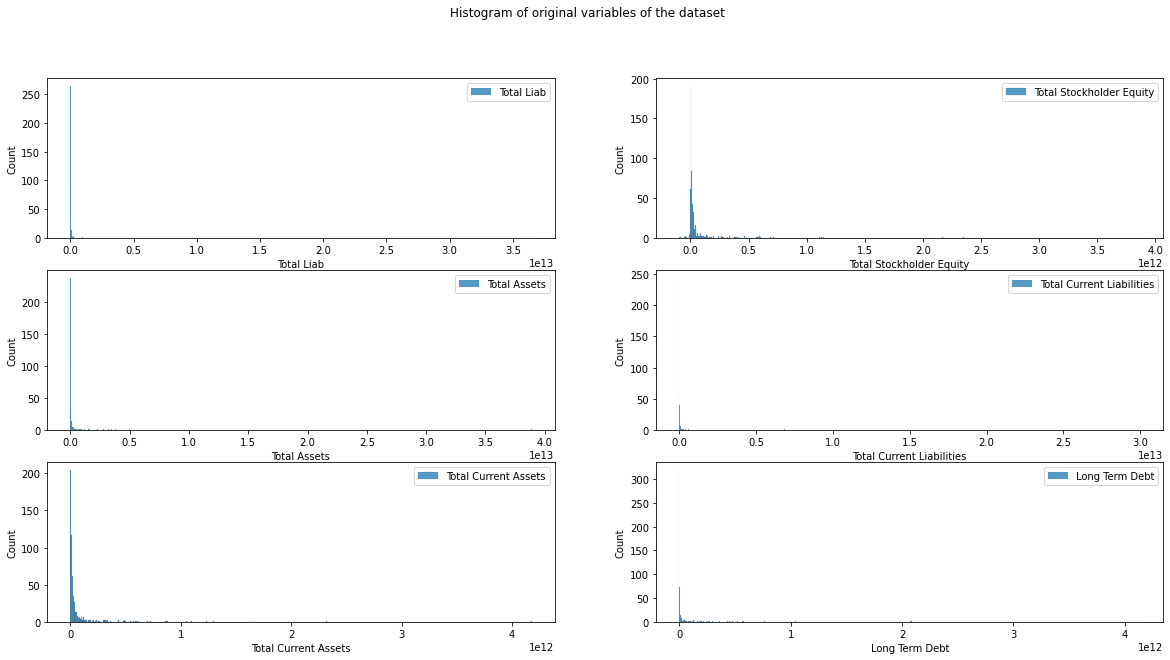

In [35]:
figure,axs = plt.subplots(3,2, figsize=(20,10))
figure.suptitle("Histogram of original variables of the dataset")


for ax,col in zip(axs.flatten(),original_cols[:6]):
    sns.histplot(df[col],ax=ax)
    ax.legend([col])

From the plots above we can see that the all the above variables seem to have a left skewed distribution

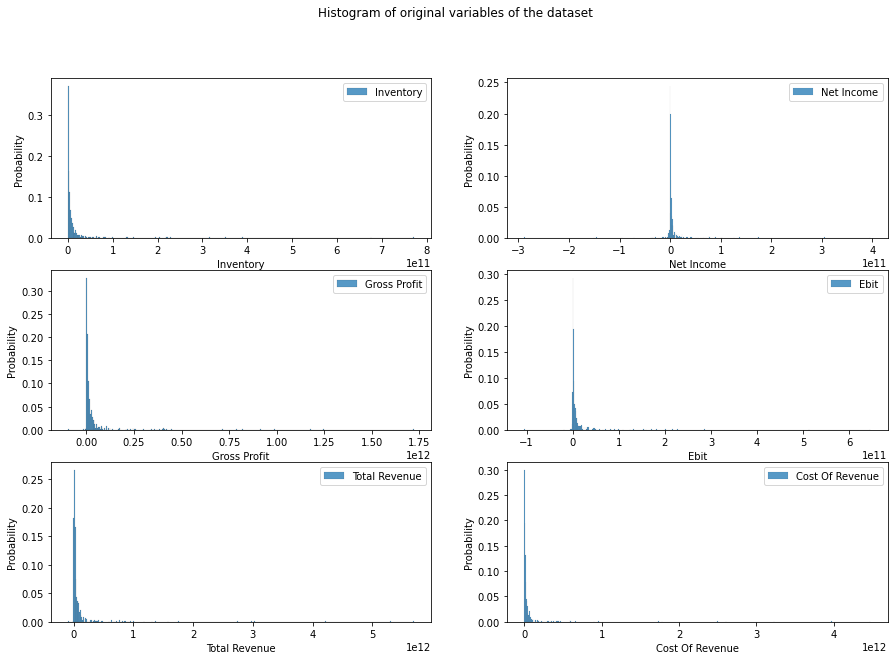

In [36]:
figure,axs = plt.subplots(3,2, figsize=(15,10))
figure.suptitle("Histogram of original variables of the dataset")


for ax,col in zip(axs.flatten(),original_cols[6:]):
    sns.histplot(df[col],ax=ax,stat='probability',legend=True)
    ax.legend([col])

From the plots above we can observe that all the variables except 'Net Income' seem to follow a left skewed distribution.Whereas the variable 'Net Income' seems to follow a symmetric distribution

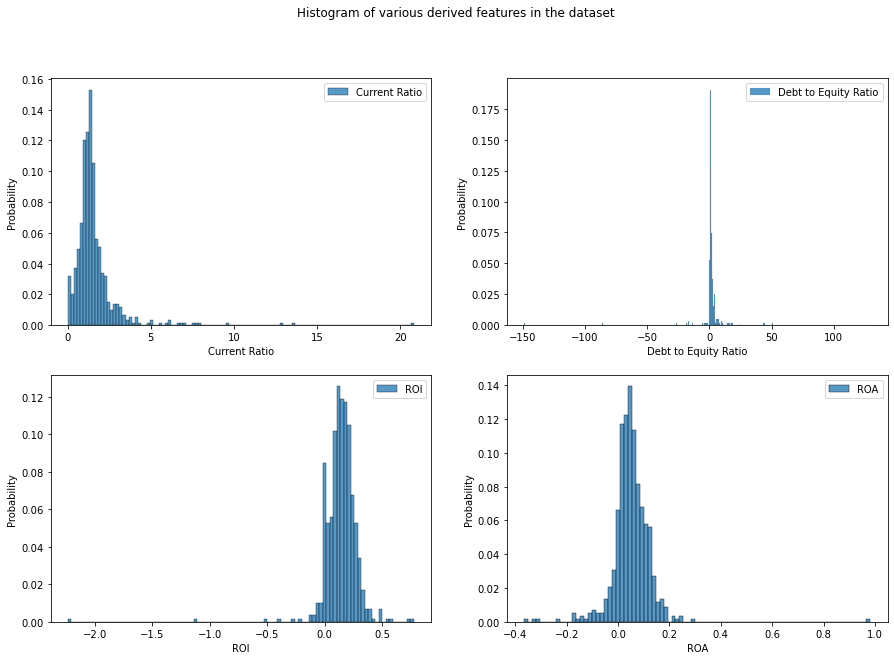

In [37]:
figure,axs = plt.subplots(2,2, figsize=(15,10))
figure.suptitle("Histogram of various derived features in the dataset")


for ax,col in zip(axs.flatten(),new_cols[:4]):
    sns.histplot(df[col],ax=ax,stat='probability')
    ax.legend([col])

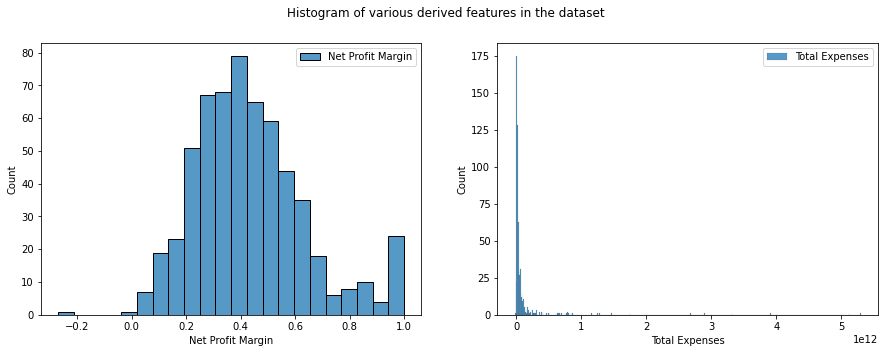

In [38]:
figure,axs = plt.subplots(1,2, figsize=(15,5))
figure.suptitle("Histogram of various derived features in the dataset")


for ax,col in zip(axs.flatten(),new_cols[4:-1]):
    sns.histplot(df[col],ax=ax)
    ax.legend([col])

From the figure above we can see that significant no of outliers are present for the above columns

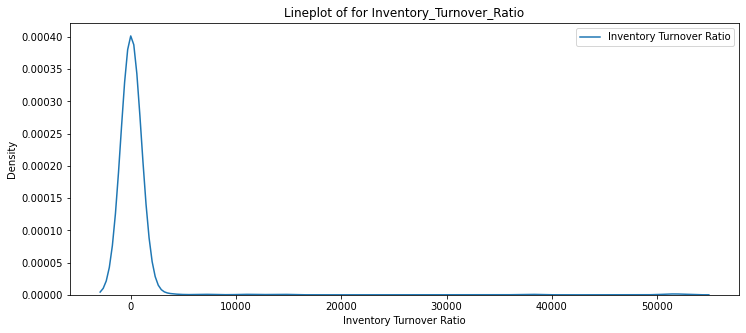

In [39]:
plt.figure(figsize=(12,5))
plt.title('Lineplot of for Inventory_Turnover_Ratio')
itr=sns.kdeplot(df['Inventory Turnover Ratio'])
itr.legend(['Inventory Turnover Ratio'])

# Checking the presence of outliers in the features using boxplots

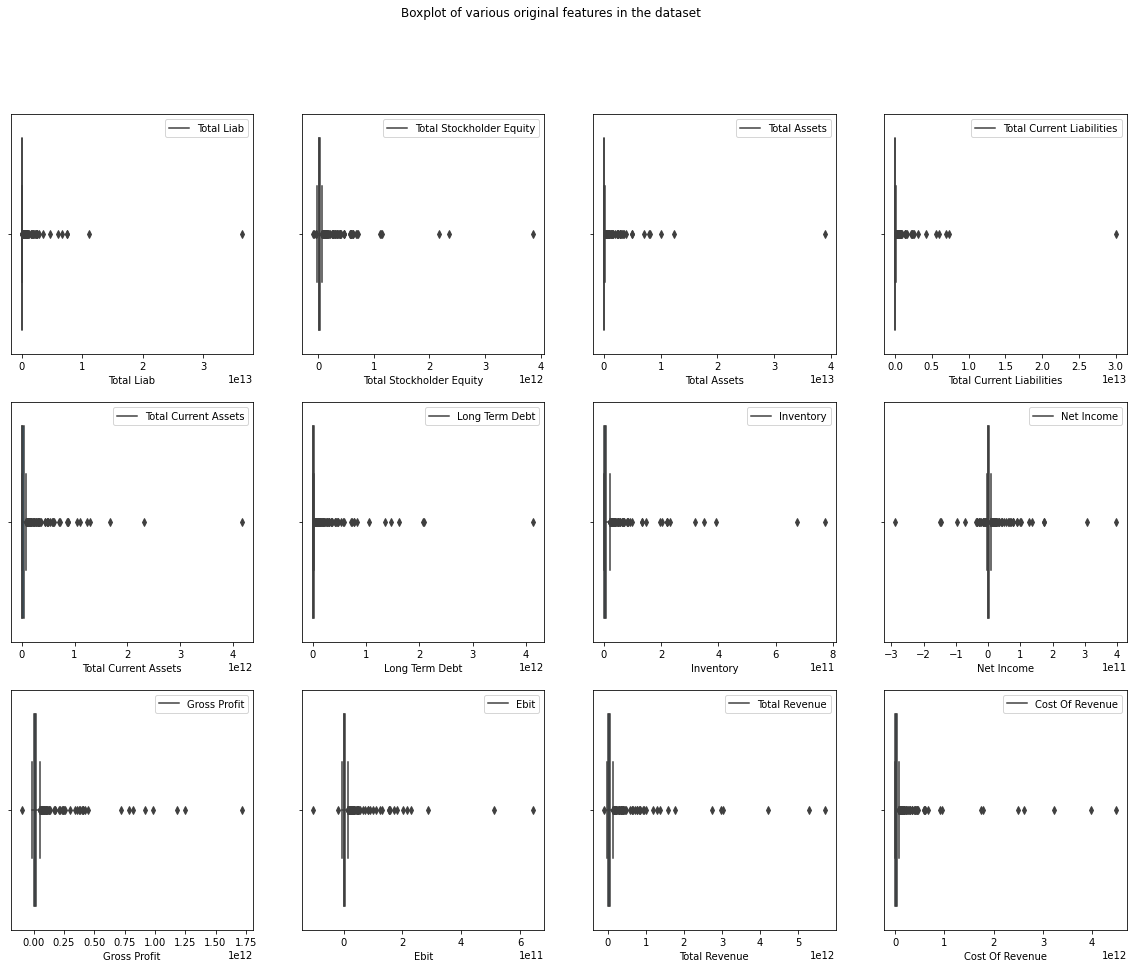

In [40]:
figure,axs = plt.subplots(3,4, figsize=(20,15))
figure.suptitle("Boxplot of various original features in the dataset")


for ax,col in zip(axs.flatten(),original_cols):
    sns.boxplot(df[col],ax=ax)
    ax.legend([col])

In [41]:
for col in original_cols:
    q1=np.percentile(df[col],25)
    q3=np.percentile(df[col],75)

    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr) 
    lower_bound = q1 - (1.5 * iqr)

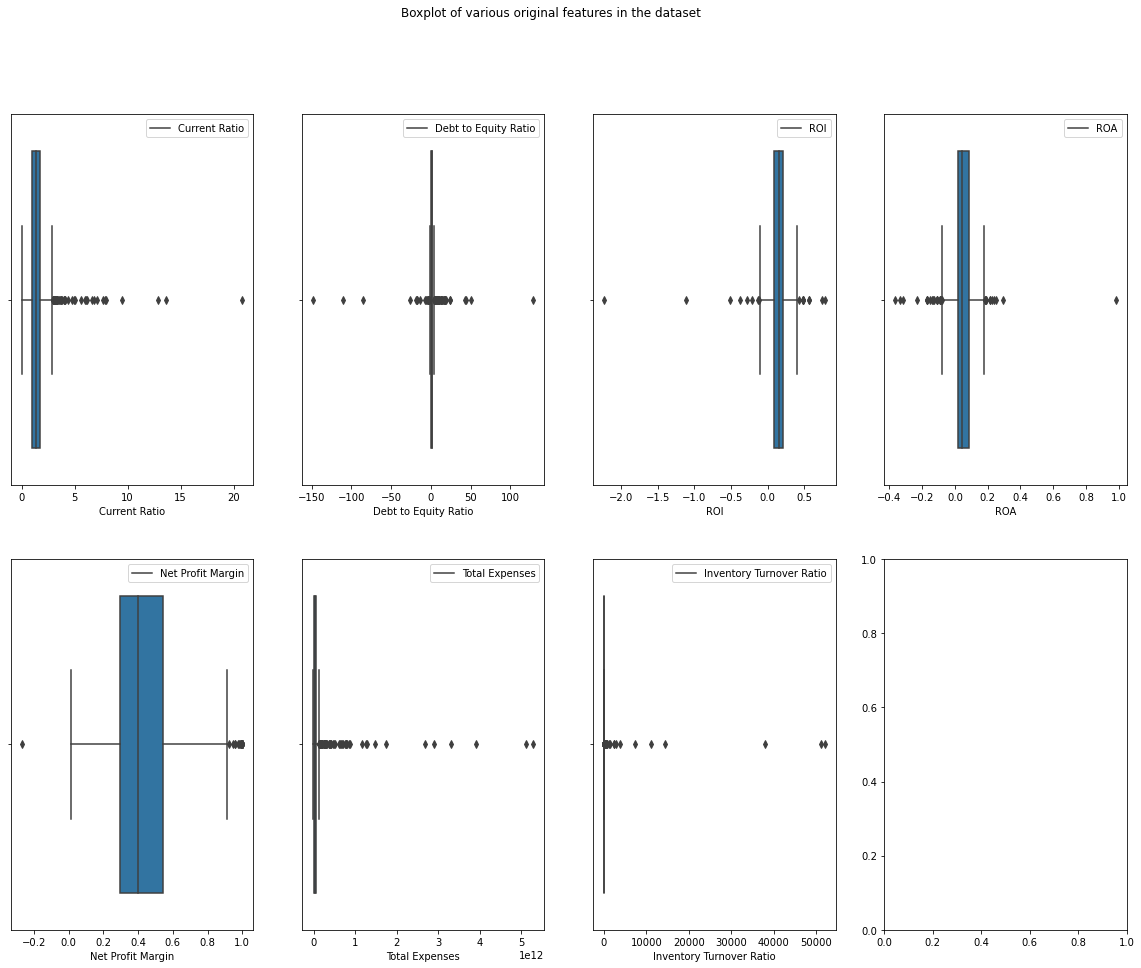

In [42]:
figure,axs = plt.subplots(2,4, figsize=(20,15))
figure.suptitle("Boxplot of various original features in the dataset")


for ax,col in zip(axs.flatten()[:-1],new_cols[:-1]):
    sns.boxplot(df[col],ax=ax)
    ax.legend([col])

From the boxplots of the original columns above,we can observe that there are significant number of outliers present for each columns.However,upon close inspection these values seem valid and are considered for the model building process

# Performing bivariate analysis on the dataset

Performing bivariate analysis among the independent variables

Performing bivariate analysis with the target variable

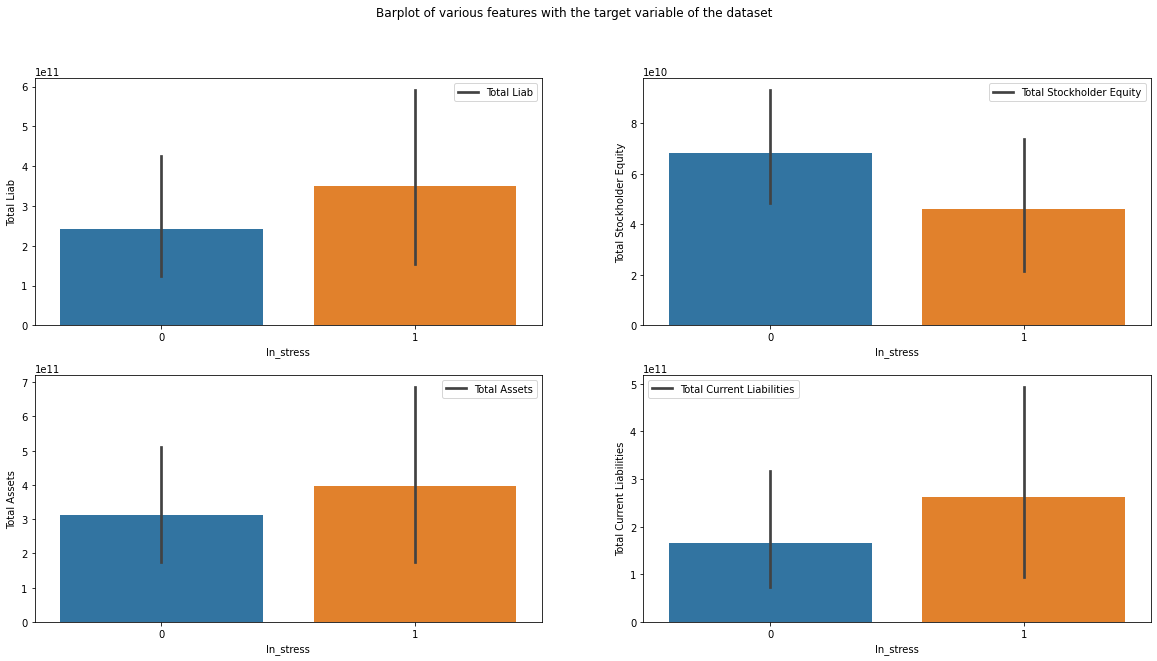

In [44]:
figure,axs = plt.subplots(2,2, figsize=(20,10))
figure.suptitle("Barplot of various features with the target variable of the dataset")


for ax,col in zip(axs.flatten(),original_cols[:4]):
    sns.barplot(x=df['In_stress'],y=df[col],ax=ax)
    ax.legend([col])

From the above barplots we can see that atleast some amount of variation exists in 'In_stress'
values due to following independent variables 'Total Liab','Total Assets','Total Current Liabilities'
and 'Total Stockholder Equity'

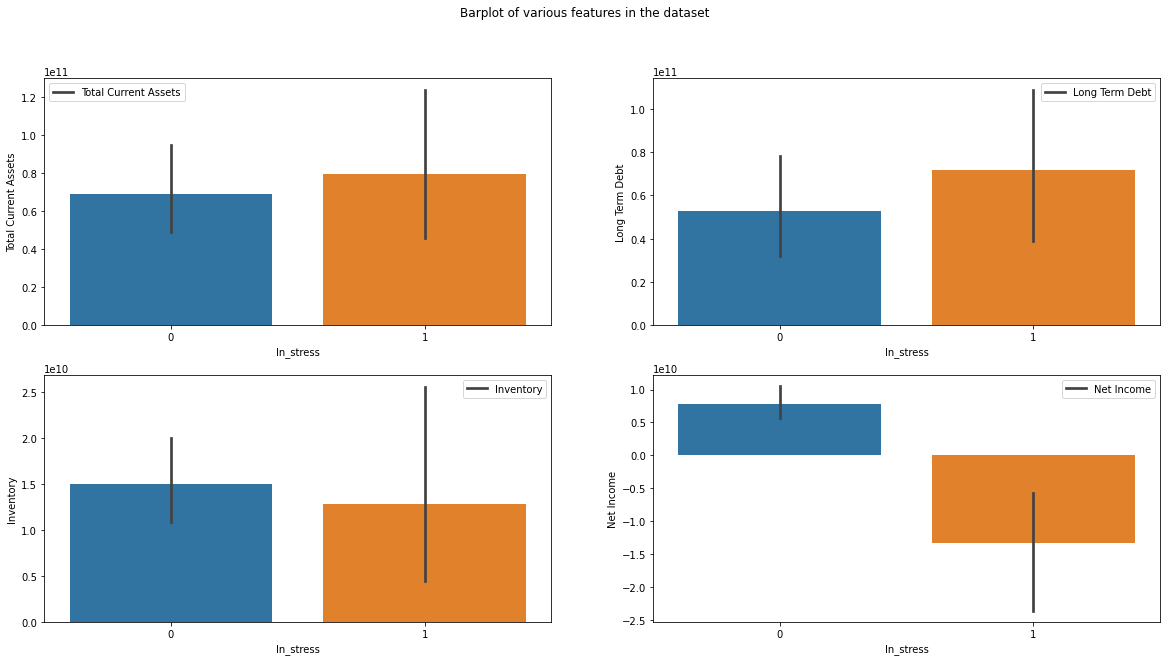

In [45]:
figure,axs = plt.subplots(2,2, figsize=(20,10))
figure.suptitle("Barplot of various features in the dataset")


for ax,col in zip(axs.flatten(),original_cols[4:8]):
    sns.barplot(x=df['In_stress'],y=df[col],ax=ax)
    ax.legend([col])

From the above barplots we can see that atleast some amount of variation exists in 'In_stress'
values due to following independent variables 'Long Term Debt'and 'Net Income'

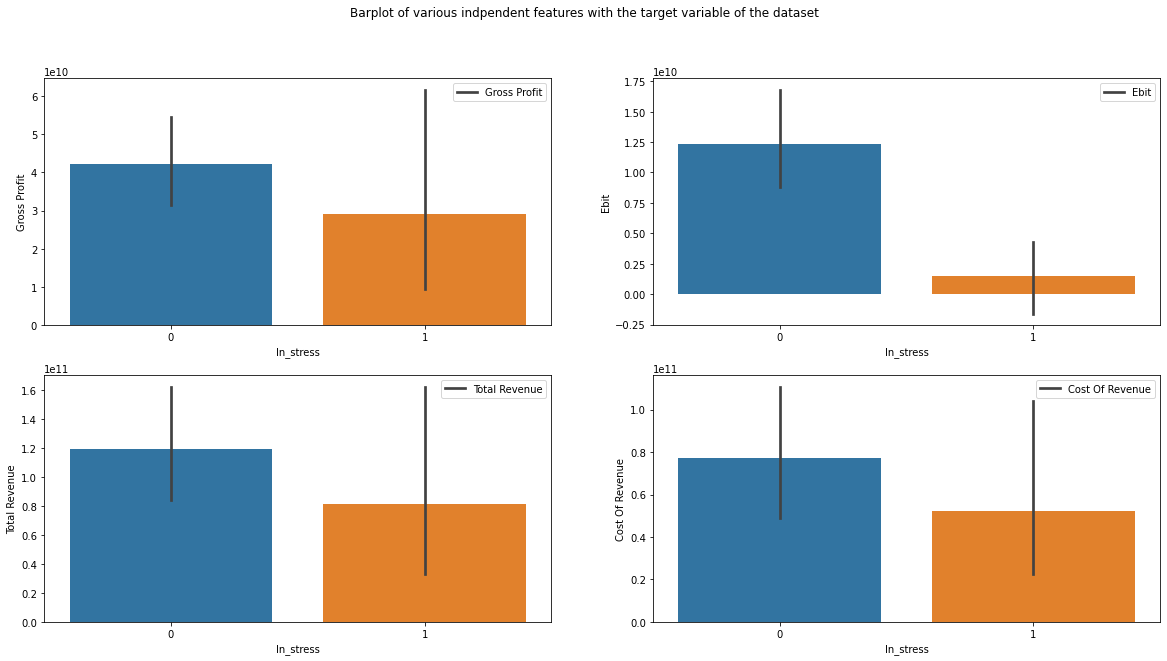

In [47]:
figure,axs = plt.subplots(2,2, figsize=(20,10))
figure.suptitle("Barplot of various indpendent features with the target variable of the dataset")


for ax,col in zip(axs.flatten(),original_cols[8:12]):
    sns.barplot(x=df['In_stress'],y=df[col],ax=ax)
    ax.legend([col])

From the above barplots we can see that atleast some amount of variation exists in 'In_stress'
values due to following independent variables 'Gross Profit','Ebit','Total Revenue' and 'Cost of Revenue'

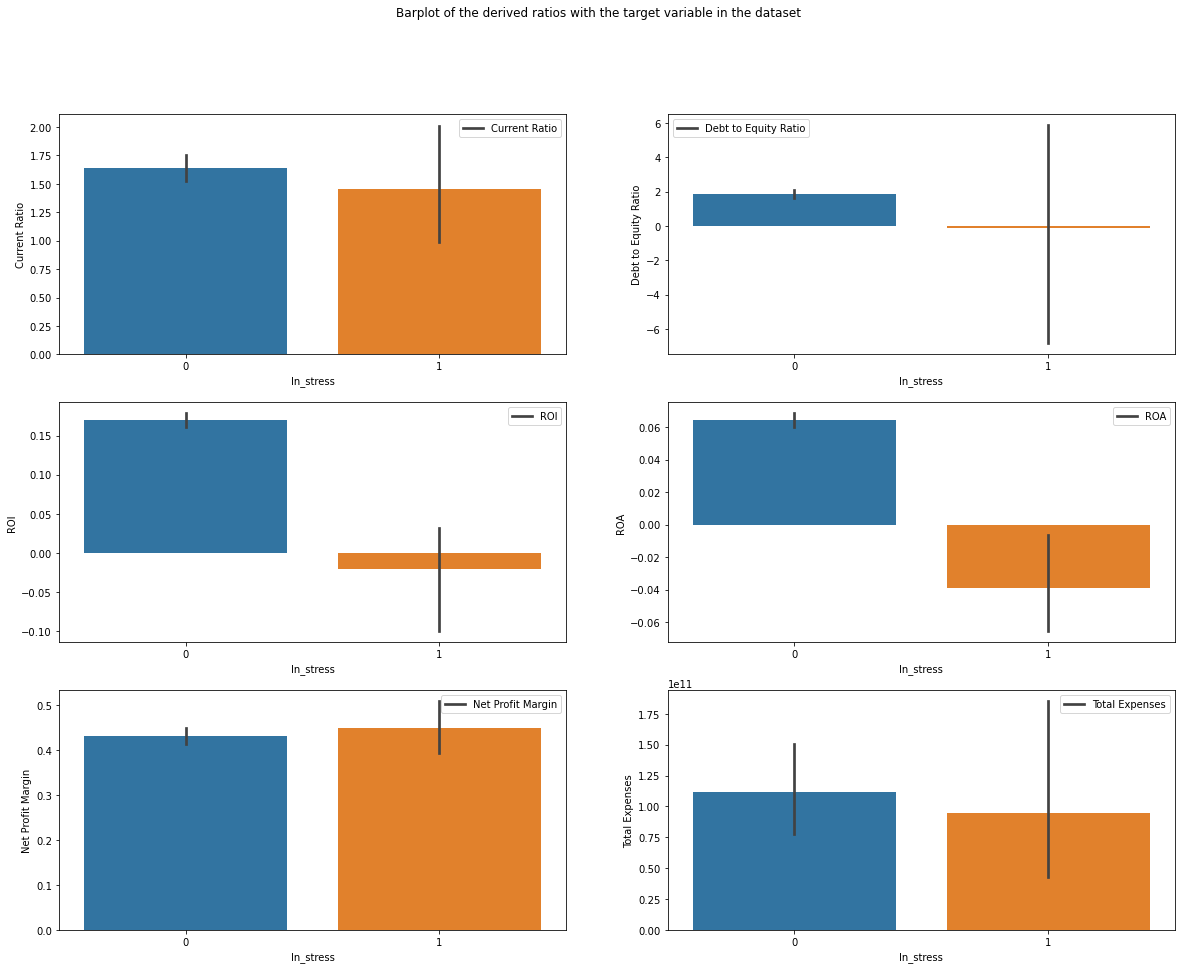

In [48]:
figure,axs = plt.subplots(3,2, figsize=(20,15))
figure.suptitle("Barplot of the derived ratios with the target variable in the dataset")


for ax,col in zip(axs.flatten(),new_cols[:-2]):
    sns.barplot(x=df['In_stress'],y=df[col],ax=ax)
    ax.legend([col])

From the above barplots we can see that atleast some amount of variation exists in 'In_stress'
values due to following independent variables 'Debt to Equity Ratio','ROI' and 'ROA' 

# Performing Hypothesis testing on the to test the statistical dependency between independent and dependent variables.

In this case since all our independent variables and target variable are of continuous type and due to non-parametric nature 
of our independent variables,we'll be using non-parametric hypothesis tests like ManneyWhitingU and Kruskall Wallis test
on our dataset

In [50]:
def Kruskal_Wallis_test(col):
    col_grouped_0 = df.loc[df.In_stress==0][col].values
    col_grouped_1 = df.loc[df.In_stress==1][col].values
    H, pval = kruskalwallis(col_grouped_0,col_grouped_1)
    if pval < 0.05:
        return("Null Hypothesis is rejected.The population medians are different for each of the groups")
    else:
        return("Null Hypothesis has failed to get rejected.The population medians are same across each of the groups")

In [51]:
def ManneyWhitney_test(col):
    col_grouped_0 = df.loc[df.In_stress==0][col].values
    col_grouped_1 = df.loc[df.In_stress==1][col].values
    H, pval = mannwhitneyu(col_grouped_0,col_grouped_1)
    if pval < 0.05:
        return("Null Hypothesis is rejected.The population medians are different for each of the groups")
    else:
        return("Null Hypothesis has failed to get rejected.The population medians are same across each of the groups")

In [52]:
for col in continuous_cols:
    print("The Manny-Whitney test results for column variable '{}' are".format(col))
    print(ManneyWhitney_test(col),"\n")

The Manny-Whitney test results for column variable 'Total Liab' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Manny-Whitney test results for column variable 'Total Stockholder Equity' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Manny-Whitney test results for column variable 'Total Assets' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Manny-Whitney test results for column variable 'Total Current Liabilities' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Manny-Whitney test results for column variable 'Total Current Assets' are
Null Hypothesis has failed to get rejected.The population medians are same across each of the groups 

The Manny-Whitney test results for column variable 'Long Term Debt' are
Null Hypothesis is rejected.The population medians are different for each of the gro

In [53]:
for col in continuous_cols:
    print("The Kruskal-Wallis test results for column variable '{}' are".format(col))
    print(Kruskal_Wallis_test(col),"\n")

The Kruskal-Wallis test results for column variable 'Total Liab' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Kruskal-Wallis test results for column variable 'Total Stockholder Equity' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Kruskal-Wallis test results for column variable 'Total Assets' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Kruskal-Wallis test results for column variable 'Total Current Liabilities' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The Kruskal-Wallis test results for column variable 'Total Current Assets' are
Null Hypothesis has failed to get rejected.The population medians are same across each of the groups 

The Kruskal-Wallis test results for column variable 'Long Term Debt' are
Null Hypothesis is rejected.The population medians are different for each of t

In [54]:
for col in continuous_cols:
    print("The results for column variable '{}' are".format(col))
    print(Kruskal_Wallis_test(col),"\n")

The results for column variable 'Total Liab' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The results for column variable 'Total Stockholder Equity' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The results for column variable 'Total Assets' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The results for column variable 'Total Current Liabilities' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The results for column variable 'Total Current Assets' are
Null Hypothesis has failed to get rejected.The population medians are same across each of the groups 

The results for column variable 'Long Term Debt' are
Null Hypothesis is rejected.The population medians are different for each of the groups 

The results for column variable 'Inventory' are
Null Hypothesis is rejected.The population medians are diffe

Based on the above test the following columns have shown a dependent relationship with the target variable:
'Total Liab',
 'Total Stockholder Equity',
 'Total Assets',
 'Total Current Liabilities',
 'Long Term Debt',
 'Inventory',
 'Net Income',
 'Ebit',
 'Current Ratio',
 'ROI',
 'ROA'

In [55]:
#Columns showing dependent relationship with the Target variable
continuous_dependent_cols=['Total Liab',
 'Total Stockholder Equity',
 'Total Assets',
 'Total Current Liabilities',
 'Long Term Debt',
 'Inventory',
 'Net Income',
 'Ebit',
 'Current Ratio',
 'ROI',
 'ROA']

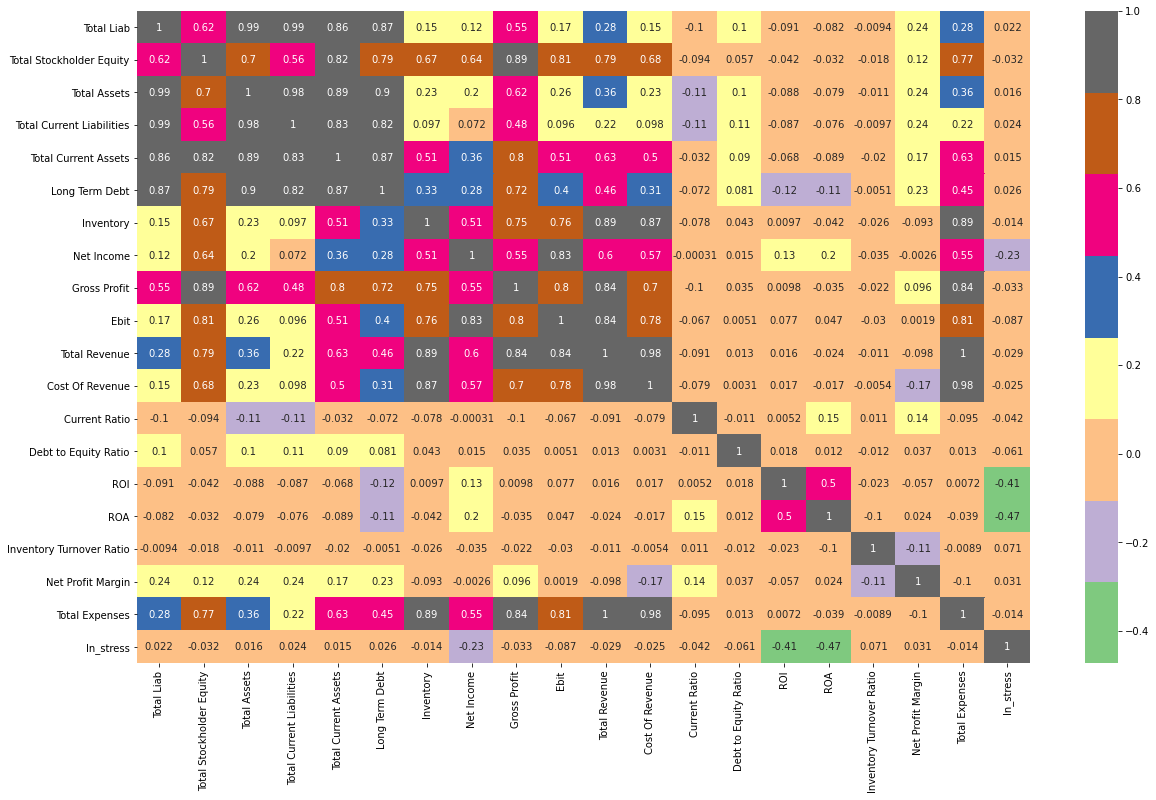

In [56]:
#Plotting the heatmap to identify correlations between continuous variables
plt.figure(figsize=(20,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='Accent',annot=True)

From the figure above we can see that significant amount of variation does exist betwen some of our independent variables.
However,in data science as the number of independent variables increases then using heatmap to eliminate columns causing
multicollinearity also becomes more and more difficult

Hence,we'll use the VIF(Variance Inflation Factor) to eliminate multicollinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        loc_max = vif.index(max(vif))
        if max(vif) > thresh:
            print('eliminating variable \'' + X.iloc[:, variables].columns[loc_max] +'\' from the list of dependent variables')
            del variables[loc_max]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [58]:
df_final=calculate_vif(df[continuous_dependent_cols])

eliminating variable 'Total Assets' from the list of dependent variables
eliminating variable 'Total Liab' from the list of dependent variables
eliminating variable 'Total Stockholder Equity' from the list of dependent variables
eliminating variable 'Ebit' from the list of dependent variables
Remaining variables:
Index(['Total Current Liabilities', 'Long Term Debt', 'Inventory',
       'Net Income', 'Current Ratio', 'ROI', 'ROA'],
      dtype='object')


Thus based on the code above we have eliminated columns 'Total Assets','Total Liab','Total Stockholder Equity' and 'Ebit'
from the list of continuous independent columns to eliminate multicollinearity

In [59]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, RELIANCE.BO to ADVANIHOTR.BO
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Current Liabilities  589 non-null    float64
 1   Long Term Debt             589 non-null    float64
 2   Inventory                  589 non-null    float64
 3   Net Income                 589 non-null    float64
 4   Current Ratio              589 non-null    float64
 5   ROI                        589 non-null    float64
 6   ROA                        589 non-null    float64
dtypes: float64(7)
memory usage: 53.0+ KB


# Building models too predict the target variable

First we will scale all the continuous variables using sklearn's Standard Scaler to ease the model building process.Currently using StandardScaler to scale the data values between 0 and 1

In [60]:
ss = StandardScaler()

In [61]:
transformed_df = ss.fit_transform(df[continuous_cols])
df[continuous_cols]=transformed_df

In [62]:
X = df[continuous_dependent_cols]
y = df['In_stress']

Importing all the necessary packages

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import precision_score,recall_score,classification_report,log_loss,f1_score

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=21,test_size=0.25,stratify=y)

Since the target variable distribution is imbalanced is nature we'll need to balance the data using a suitable sampling technique

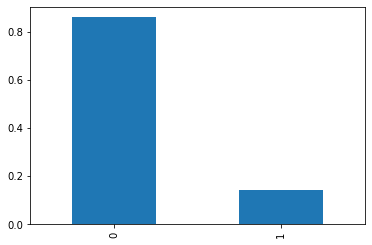

In [65]:
(df.In_stress.value_counts()/len(df)).plot(kind='bar')

Here I am using SMOTETomekLinks techniques to resample the datasize.The SMOTE techniques performs oversampling on the minority
class and attempts to balance the data.Whereas the Tomeklinks techniques are used to remove overlapping datapoints

In [66]:
smtom =SMOTETomek(random_state=23)

In [67]:
X_train_smtom,y_train_smtom = smtom.fit_resample(X_train,y_train)

In [68]:
X_train_smtom.shape

(756, 11)

In [69]:
y_train_smtom.value_counts()

0    378
1    378
Name: In_stress, dtype: int64

Initially Using a dummy classifier

# Training a logistic regression model

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train_smtom,y_train_smtom)

LogisticRegression()

Calculating the accuracy the train dataset

In [72]:
lr.score(X_train_smtom,y_train_smtom)

0.9126984126984127

Calculating the accuracy the test dataset

In [73]:
lr.score(X_test,y_test)

0.8851351351351351

In [74]:
lr_pred=lr.predict(X_test)

In [75]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       127
           1       0.57      0.76      0.65        21

    accuracy                           0.89       148
   macro avg       0.76      0.83      0.79       148
weighted avg       0.90      0.89      0.89       148



# Training a Gaussian Naive Bayes model on the train dataset

In [76]:
nb = GaussianNB()

In [77]:
nb.fit(X_train_smtom,y_train_smtom)

GaussianNB()

Calculating the score on the train dataset

In [78]:
nb.score(X_train_smtom,y_train_smtom)

0.5211640211640212

Calculating the score on the test dataset

In [79]:
nb.score(X_test,y_test)

0.19594594594594594

In [80]:
nb_pred = nb.predict(X_test)

Printing out the classification report

In [81]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.90      0.07      0.13       127
           1       0.14      0.95      0.25        21

    accuracy                           0.20       148
   macro avg       0.52      0.51      0.19       148
weighted avg       0.79      0.20      0.15       148



# Training a SVM model

In [82]:
svc =SVC()

In [83]:
svc.fit(X_train_smtom,y_train_smtom)

SVC()

Calculating the score o the train dataset

In [84]:
svc.score(X_train_smtom,y_train_smtom)

0.9695767195767195

Calculating the score on the test dataset

In [85]:
svc.score(X_test,y_test)

0.9459459459459459

In [86]:
svc_pred=svc.predict(X_test)

Printing out the classification report

In [87]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       127
           1       0.76      0.90      0.83        21

    accuracy                           0.95       148
   macro avg       0.87      0.93      0.90       148
weighted avg       0.95      0.95      0.95       148



# Training a KNN Classifier

In [88]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_smtom,y_train_smtom)

KNeighborsClassifier(n_neighbors=11)

Calculating the score on train dataset

In [89]:
knn.score(X_train_smtom,y_train_smtom)

0.9642857142857143

Calculating the score on the test dataset

In [90]:
knn.score(X_test,y_test)

0.9459459459459459

In [91]:
knn_pred=knn.predict(X_test)

Printing out the classification report

In [92]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       127
           1       0.76      0.90      0.83        21

    accuracy                           0.95       148
   macro avg       0.87      0.93      0.90       148
weighted avg       0.95      0.95      0.95       148



# Training a Random Forest Classifier 

In [93]:
rf=RandomForestClassifier()

In [94]:
rf.fit(X_train_smtom,y_train_smtom)

RandomForestClassifier()

Calculating the accuracy on the train dataset

In [96]:
rf.score(X_train_smtom,y_train_smtom)

1.0

Calculating the score on the test dataset

In [95]:
rf.score(X_test,y_test)

0.9797297297297297

In [97]:
rf_pred=rf.predict(X_test)

Printing out the classification report

In [98]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.86      0.92        21

    accuracy                           0.98       148
   macro avg       0.99      0.93      0.96       148
weighted avg       0.98      0.98      0.98       148



From the above model building results we can see that Logistic Regression,SVM Classifer and KNN Classifier are yeilding good results.Hence we will optimize hyper-parameters for these models and compare the performance

# Hyper-parameter tuning for Logistic Regression

In [759]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','elasticnet']
c_values = [10, 1.0, 0.1, 0.01,0.001]

In [760]:
lr_new=LogisticRegression()

In [761]:
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [762]:
lr_search = GridSearchCV(lr_new,param_grid=lr_grid,scoring='recall',n_jobs=-1,cv=5)

In [763]:
lr_search.fit(X_train_smtom,y_train_smtom)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='recall')

In [764]:
lr_search.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [765]:
lr_search.best_score_

0.9788070175438597

In [766]:
lr_best=lr_result.best_estimator_

In [767]:
new_lr = LogisticRegression(C=10,penalty='elasticnet',solver='newton-cg')

In [768]:
lr_pred=lr_best.predict(X_test)

In [769]:
print("The train score for new logistic regression model is ",lr_n.score(X_train_smtom,y_train_smtom))
print("The test score for new logistic regression model is ",lr_n.score(X_test,y_test))

The train score for new logistic regression model is  0.9140211640211641
The test score for new logistic regression model is  0.8986486486486487


In [770]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       127
           1       0.61      0.81      0.69        21

    accuracy                           0.90       148
   macro avg       0.79      0.86      0.82       148
weighted avg       0.92      0.90      0.90       148



# Hyper-parameter tuning for SVM Classifier

In [771]:
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01,0.001]
gamma = ['scale','auto']

In [772]:
svm_grid = dict(kernel=kernel,C=C,gamma=gamma)

In [773]:
svm_new=SVC()

In [774]:
svc_search = GridSearchCV(svm_new,param_grid=svm_grid,scoring='recall',n_jobs=-1,cv=5)

In [775]:
svc_results=svc_search.fit(X_train_smtom,y_train_smtom)

In [776]:
svc_results.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [777]:
svc_results.best_score_

0.9920701754385964

In [778]:
svm_n = SVC(**svc_results.best_params_)

In [779]:
svm_n.fit(X_train_smtom,y_train_smtom)

SVC(C=10, gamma='auto')

In [780]:
svm_pred = svm_n.predict(X_test)

In [781]:
print("The train score for new SVM model is ",svm_n.score(X_train_smtom,y_train_smtom))
print("The test score for new SVM model is ",svm_n.score(X_test,y_test))

The train score for new SVM model is  0.9828042328042328
The test score for new SVM model is  0.9662162162162162


In [782]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       127
           1       0.94      0.81      0.87        21

    accuracy                           0.97       148
   macro avg       0.96      0.90      0.93       148
weighted avg       0.97      0.97      0.97       148



# Hyperparameter tuning For KNN Classifier

In [783]:
knn_grid={'n_neighbors':list(range(10,110,10)),
'leaf_size':[1,2,3,5],
'weights':['uniform', 'distance'],
'algorithm':['auto', 'ball_tree','kd_tree','brute'],
'n_jobs':[-1]}

In [784]:
knn_new=KNeighborsClassifier()

In [785]:
knn_search = GridSearchCV(knn_new,param_grid=knn_grid,scoring=,'recall',n_jobs=-1,cv=5)

In [786]:
knn_results=knn_search.fit(X_train_smtom,y_train_smtom)

In [787]:
knn_results.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 10,
 'weights': 'distance'}

In [788]:
knn_new=knn_results.best_estimator_

In [789]:
knn_pred=knn_new.predict(X_test)

In [790]:
print("The train score for new KNN model is ",knn_new.score(X_train_smtom,y_train_smtom))
print("The test score for new KNN model is ",knn_new.score(X_test,y_test))

The train score for new KNN model is  1.0
The test score for new KNN model is  0.9527027027027027


In [791]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       127
           1       0.79      0.90      0.84        21

    accuracy                           0.95       148
   macro avg       0.89      0.93      0.91       148
weighted avg       0.96      0.95      0.95       148



# Hyperparameter tuning For Random Forest Classifier

In [796]:
rf_params={
'n_estimators':list(range(10,100,10)),
'max_features':['auto','sqrt','log2'],
'max_depth':[None,10,20,30,40,50],
'min_samples_split':[2,4,8,16,32,64],
'min_samples_leaf':[2,4,8,16,32,64]
}

In [797]:
rf_new=RandomForestClassifier()

In [798]:
rf_search = GridSearchCV(rf_new,param_grid=rf_params,scoring='recall',n_jobs=-1,cv=5)

In [799]:
rf_search.fit(X_train_smtom,y_train_smtom)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 8, 16, 32, 64],
                         'min_samples_split': [2, 4, 8, 16, 32, 64],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='recall')

In [800]:
rf_search.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 10}

In [801]:
rf_best = rf_search.best_estimator_

In [802]:
rf_pred = rf_best.predict(X_test)

In [804]:
print("The train score for new RandomForest model is ",rf_best.score(X_train_smtom,y_train_smtom))
print("The test score for new RandomForest model is ",rf_best.score(X_test,y_test))

The train score for new RandomForest model is  0.996031746031746
The test score for new RandomForest model is  0.9797297297297297


In [805]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.86      0.92        21

    accuracy                           0.98       148
   macro avg       0.99      0.93      0.96       148
weighted avg       0.98      0.98      0.98       148



Hence,from the results above we can see that our KNN classifier is the model which gives best recall on the test data.
Hence,we need use that model for obtain predictions